Import the needed files and libraries

In [1]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

Saving Times New Roman.ttf to Times New Roman.ttf
Saving pos_dss.tsv to pos_dss.tsv
Saving neg_dss.tsv to neg_dss.tsv
Saving pos_rand.fasta to pos_rand.fasta
Saving pos_cleaned.fasta to pos_cleaned.fasta


Check that the files were imported

In [2]:
uploaded.keys()

dict_keys(['Times New Roman.ttf', 'pos_dss.tsv', 'neg_dss.tsv', 'pos_rand.fasta', 'pos_cleaned.fasta'])

Read both TSVs as dataframes and assign labels

In [3]:
neg_labels = ["UniProt_ID", "Species", "Kingdom", "Seq_Length", "TransM_Helix_90", "T or B"]
pos_labels = ["UniProt_ID", "Species", "Kingdom", "Seq_Length", "Cleavage", "T or B"]
unf_neg = pd.read_csv("neg_dss.tsv", sep = "\t", names = neg_labels)
unf_pos = pd.read_csv("pos_dss.tsv", sep = "\t",  names = pos_labels)

neg = unf_neg[["UniProt_ID", "Species", "Kingdom", "Seq_Length"]]
pos = unf_pos[["UniProt_ID", "Species", "Kingdom", "Seq_Length","Cleavage"]]

neg = neg.assign(Cleavage=0)
pos = pos.assign(TransM_Helix_90="NIL")

neg = pd.concat([neg, unf_neg["TransM_Helix_90"]],axis=1)

neg = pd.concat([neg, unf_neg["T or B"]], axis=1)
pos = pd.concat([pos, unf_pos["T or B"]], axis=1)

Edit the "Kingdom" row, to change all the kingdoms that are not "Metazoa", "Fungi" and "Viridiplantae" to "Others"

In [4]:
keep_labels = ["Metazoa", "Viridiplantae", "Fungi"]

for index, row in neg.iterrows():
    if row["Kingdom"] not in keep_labels:
        neg.at[index, "Kingdom"] = "Other"

for index, row in pos.iterrows():
    if row["Kingdom"] not in keep_labels:
        pos.at[index, "Kingdom"] = "Other"

data = pd.concat([pos, neg])

data.to_csv("data.tsv", sep = "\t", index=False, header=True)

Create subdataframes

In [5]:
#Training and Benchmarking Datasets
t = data[(data["T or B"] != 0)]
b = data[(data["T or B"] == 0)]

#Training and Benchmarking Datasets divided according to the presence (positive) or absence (negative) of the signal
t_neg = neg[(neg["T or B"] != 0)]
t_pos = pos[(pos["T or B"] != 0)]
b_neg = neg[(neg["T or B"] == 0)]
b_pos = pos[(pos["T or B"] == 0)]

Set the theme in Seaborn

In [6]:
sns.set_theme()
sns.set_theme(context='notebook',style='whitegrid',palette='viridis',font='Times New Roman',font_scale=1,color_codes=True,rc={"font.family": ["Times New Roman", "Times", "Times Roman", "serif"]})

font_path = list(uploaded.keys())[0]
fm.fontManager.addfont(font_path)
mpl.rcParams['font.family'] = 'Times New Roman'

**First Plots. Taxonomic distributions**

**Kingdom**

Training Set

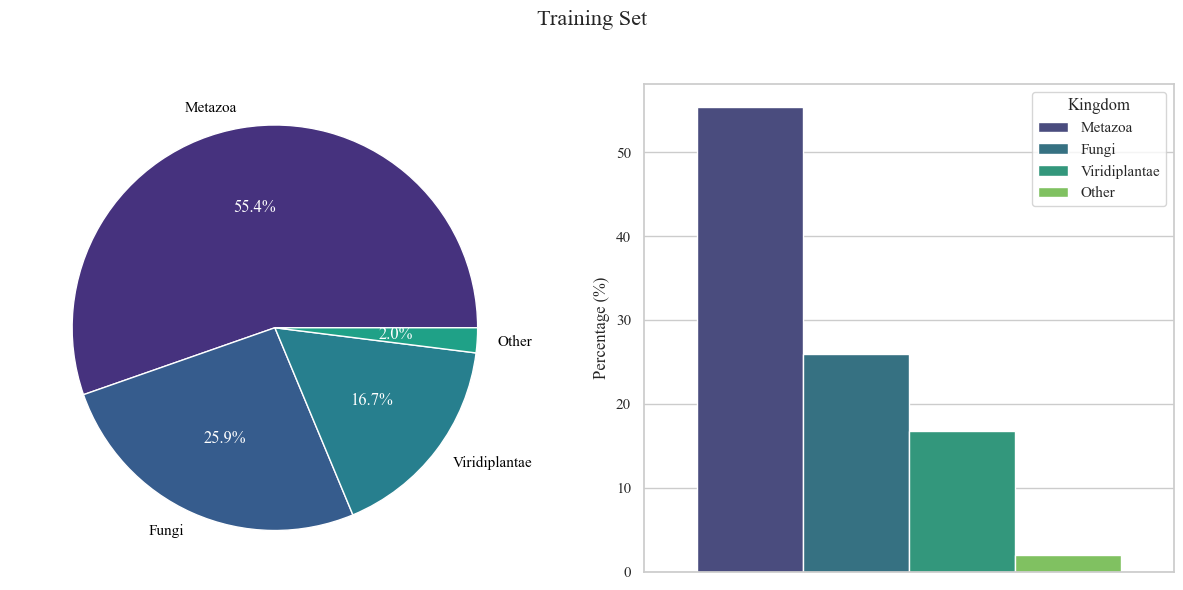

In [7]:
#Count the values and percentages
t_kingdom = t['Kingdom'].value_counts()
t_percent = t_kingdom / t_kingdom.sum() * 100

#Divide the plot in two
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle("Training Set", fontsize=16, fontweight='bold')

#Create the pie plot and format the labels
wedges, texts, autotexts = ax1.pie(t_kingdom, labels=t_kingdom.index, autopct='%.1f%%',)
ax1.axis('equal')

for text in texts:
    text.set_color("black")
    text.set_fontsize(11)
for autotext in autotexts:
    autotext.set_color("white")
    autotext.set_fontweight("bold")

#Create the bar plot
sns.barplot(hue=t_percent.index, y=t_percent.values, legend=True, ax=ax2, palette="viridis", native_scale=True)
ax2.set_ylabel("Percentage (%)")

#Display the plots
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
#plt.savefig("t_kingdom.pdf", dpi=1000, format="pdf")
#plt.clf()

Positive Training Set

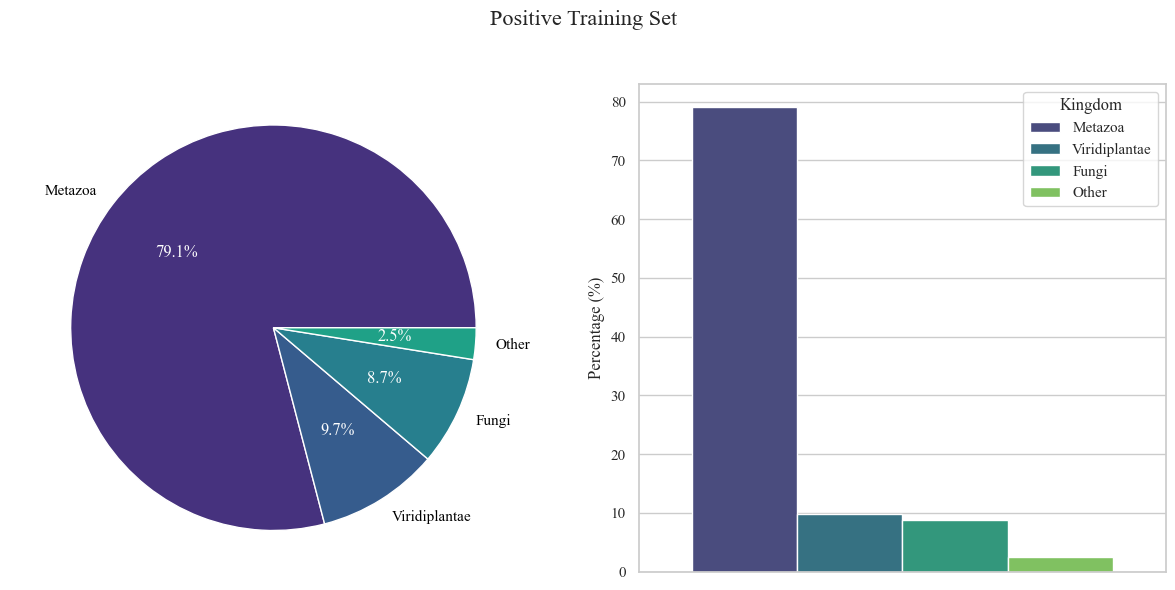

In [8]:
#Count the values and percentages
pos_t_kingdom = t_pos['Kingdom'].value_counts()
pos_t_percent = pos_t_kingdom / pos_t_kingdom.sum() * 100

#Divide the plot in two
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle("Positive Training Set", fontsize=16, fontweight='bold')

#Create the pie plot and format the labels
wedges, texts, autotexts = ax1.pie(pos_t_kingdom, labels=pos_t_kingdom.index, autopct='%.1f%%',)
ax1.axis('equal')

for text in texts:
    text.set_color("black")
    text.set_fontsize(11)
for autotext in autotexts:
    autotext.set_color("white")
    autotext.set_fontweight("bold")

#Create the bar plot
sns.barplot(hue=pos_t_percent.index, y=pos_t_percent.values, legend=True, ax=ax2, palette="viridis", native_scale=True)
ax2.set_ylabel("Percentage (%)")

#Display the plots
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
#plt.savefig("pos_t_kingdom.pdf", dpi=1000, format="pdf")
#plt.clf()

Negative Training Set

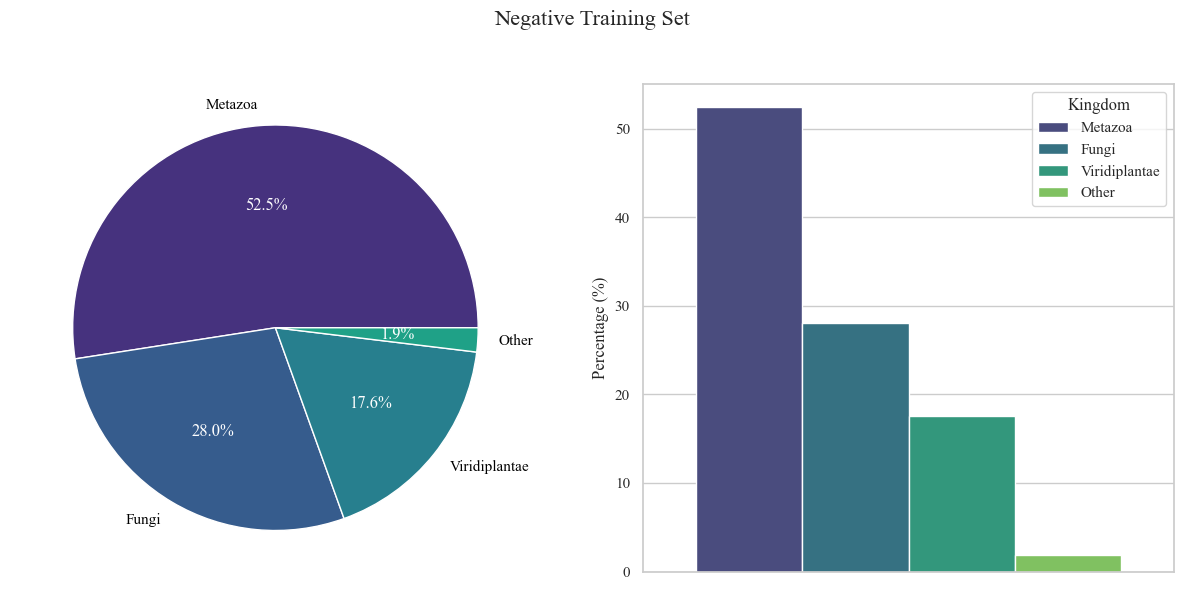

In [9]:
#Count the values and percentages
neg_t_kingdom = t_neg['Kingdom'].value_counts()
neg_t_percent = neg_t_kingdom / neg_t_kingdom.sum() * 100

#Divide the plot in two
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle("Negative Training Set", fontsize=16, fontweight='bold')

#Create the pie plot and format the labels
wedges, texts, autotexts = ax1.pie(neg_t_kingdom, labels=neg_t_kingdom.index, autopct='%.1f%%',)
ax1.axis('equal')

for text in texts:
    text.set_color("black")
    text.set_fontsize(11)
for autotext in autotexts:
    autotext.set_color("white")
    autotext.set_fontweight("bold")

#Create the bar plot
sns.barplot(hue=neg_t_percent.index, y=neg_t_percent.values, legend=True, ax=ax2, palette="viridis", native_scale=True)
ax2.set_ylabel("Percentage (%)")

#Display the plots
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
#plt.savefig("neg_t_kingdom.pdf", dpi=1000, format="pdf")
#plt.clf()

Benchmarking Set

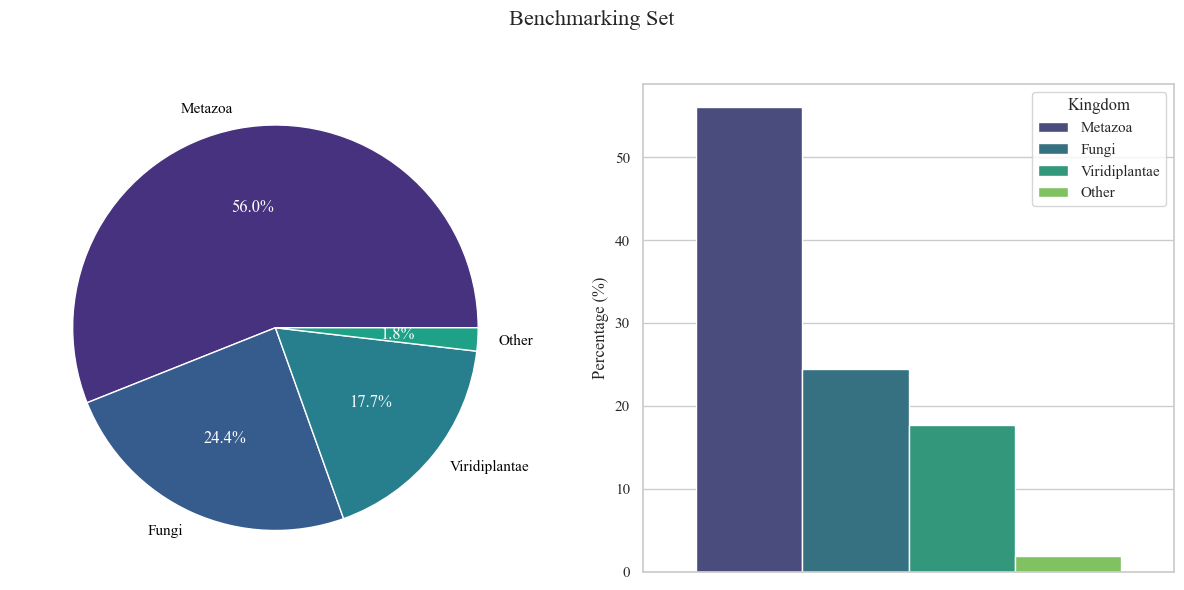

In [10]:
#Count the values and percentages
b_kingdom = b['Kingdom'].value_counts()
b_percent = b_kingdom / b_kingdom.sum() * 100

#Divide the plot in two
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle("Benchmarking Set", fontsize=16, fontweight='bold')

#Create the pie plot and format the labels
wedges, texts, autotexts = ax1.pie(b_kingdom, labels=b_kingdom.index, autopct='%.1f%%',)
ax1.axis('equal')

for text in texts:
    text.set_color("black")
    text.set_fontsize(11)
for autotext in autotexts:
    autotext.set_color("white")
    autotext.set_fontweight("bold")

#Create the bar plot
sns.barplot(hue=b_percent.index, y=b_percent.values, legend=True, ax=ax2, palette="viridis", native_scale=True)
ax2.set_ylabel("Percentage (%)")

#Display the plots
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
#plt.savefig("b_kingdom.pdf", dpi=1000, format="pdf")
#plt.clf()

Positive Benchmarking Set

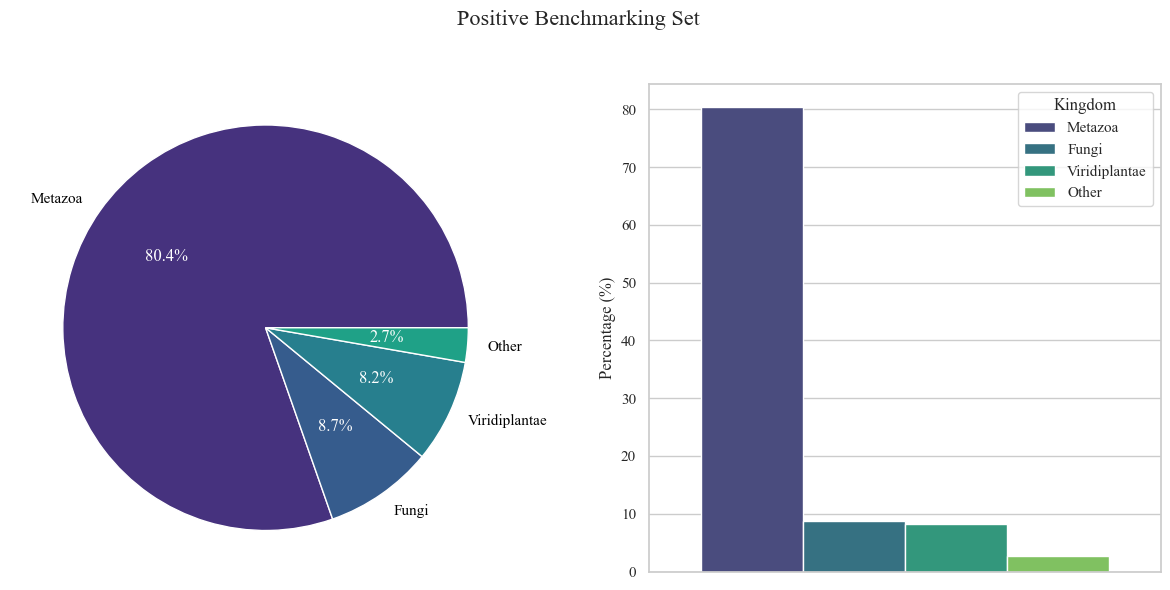

In [11]:
#Count the values and percentages
pos_b_kingdom = b_pos['Kingdom'].value_counts()
pos_b_percent = pos_b_kingdom / pos_b_kingdom.sum() * 100

#Divide the plot in two
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle("Positive Benchmarking Set", fontsize=16, fontweight='bold')

#Create the pie plot and format the labels
wedges, texts, autotexts = ax1.pie(pos_b_kingdom, labels=pos_b_kingdom.index, autopct='%.1f%%',)
ax1.axis('equal')

for text in texts:
    text.set_color("black")
    text.set_fontsize(11)
for autotext in autotexts:
    autotext.set_color("white")
    autotext.set_fontweight("bold")

#Create the bar plot
sns.barplot(hue=pos_b_percent.index, y=pos_b_percent.values, legend=True, ax=ax2, palette="viridis", native_scale=True)
ax2.set_ylabel("Percentage (%)")

#Display the plots
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
#plt.savefig("pos_b_kingdom.pdf", dpi=1000, format="pdf")
#plt.clf()

Negative Benchmarking Set

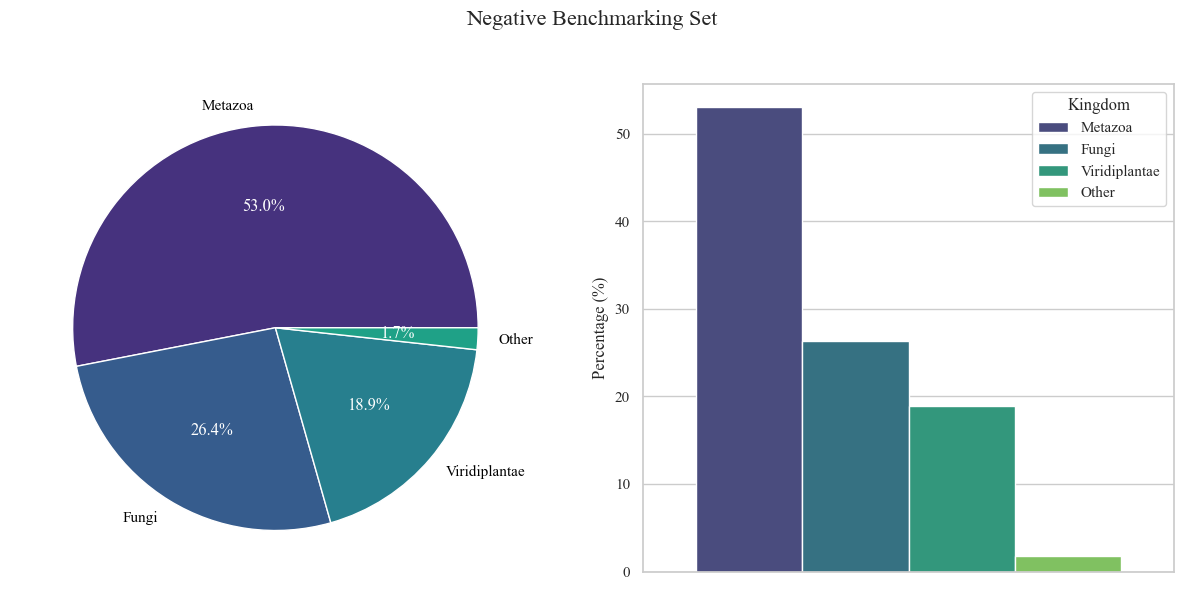

In [12]:
#Count the values and percentages
neg_b_kingdom = b_neg['Kingdom'].value_counts()
neg_b_percent = neg_b_kingdom / neg_b_kingdom.sum() * 100

#Divide the plot in two
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle("Negative Benchmarking Set", fontsize=16, fontweight='bold')

#Create the pie plot and format the labels
wedges, texts, autotexts = ax1.pie(neg_b_kingdom, labels=neg_b_kingdom.index, autopct='%.1f%%',)
ax1.axis('equal')

for text in texts:
    text.set_color("black")
    text.set_fontsize(11)
for autotext in autotexts:
    autotext.set_color("white")
    autotext.set_fontweight("bold")

#Create the bar plot
sns.barplot(hue=neg_b_percent.index, y=neg_b_percent.values, legend=True, ax=ax2, palette="viridis", native_scale=True)
ax2.set_ylabel("Percentage (%)")

#Display the plots
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
#plt.savefig("neg_b_kingdom.pdf", dpi=1000, format="pdf")
#plt.clf()

**Species plots**

Training Set

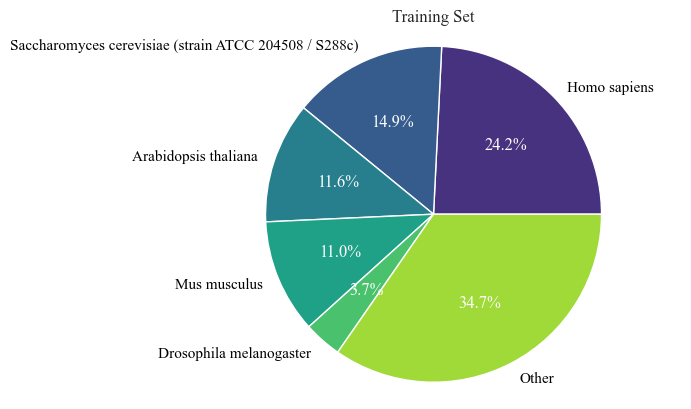

In [13]:
#Edit the dataframe to preserve only the most frequent species.
keep_labels = ["Homo sapiens", "Mus musculus", "Saccharomyces cerevisiae (strain ATCC 204508 / S288c)", "Arabidopsis thaliana", "Schizosaccharomyces pombe (strain 792 / ATCC 24843)", "Drosophila melanogaster"]
for index, row in t.iterrows():
    if row["Species"] not in keep_labels:
        t.at[index, "Species"] = "Other"

#Count the values and locate 'Other' as the last section of the pie
t_species = t['Species'].value_counts()
if "Other" in t_species.index:
    t_species = pd.concat([t_species.drop("Other"), t_species.loc[["Other"]]])


#Create the pie plot and format the labels
plt.title("Training Set")
wedges, texts, autotexts = plt.pie(t_species, labels=t_species.index, autopct='%.1f%%')
plt.axis('equal')

for text in texts:
    text.set_color("black")
    text.set_fontsize(11)
for autotext in autotexts:
    autotext.set_color("white")
    autotext.set_fontweight("bold")

#Display the plot
plt.show()
#plt.savefig("t_species.pdf", dpi=1000, format="pdf",bbox_inches="tight",pad_inches=0.2)
#plt.clf()

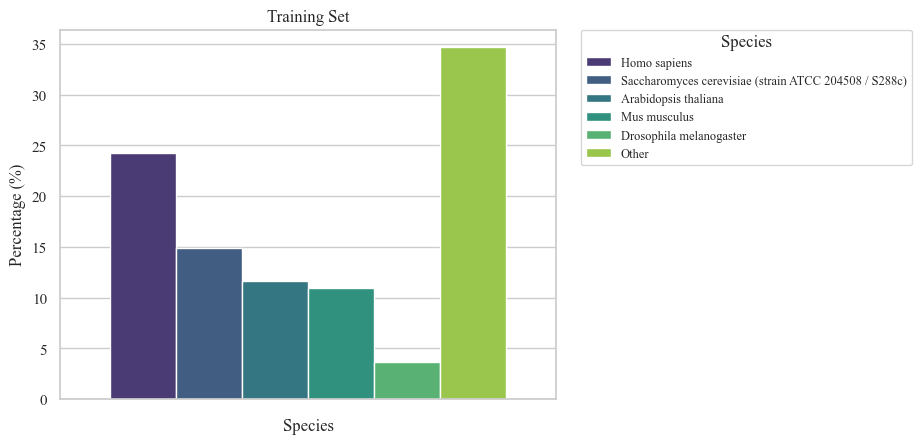

In [14]:
#Compute the percentages and locate 'Other' as the last column
t_percent = t_species / t_species.sum() * 100
t_percent = t_percent.sort_values(ascending=False)
if "Other" in t_percent.index:
  t_percent = pd.concat([t_percent.drop("Other"), t_percent.loc[["Other"]]])

#Create the bar plot
ax = sns.barplot(hue=t_percent.index, y=t_percent.values, palette="viridis")
ax.set_title("Training Set")
ax.set_ylabel("Percentage (%)")
ax.set_xlabel("Species")

#Move the legend outside the plot
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,fontsize=9,title="Species")

#Display the plots
plt.show()
#plt.savefig("t_species_bar.pdf", dpi=1000, format="pdf",bbox_inches="tight",pad_inches=0.2)
#plt.clf()

Positive Training Set

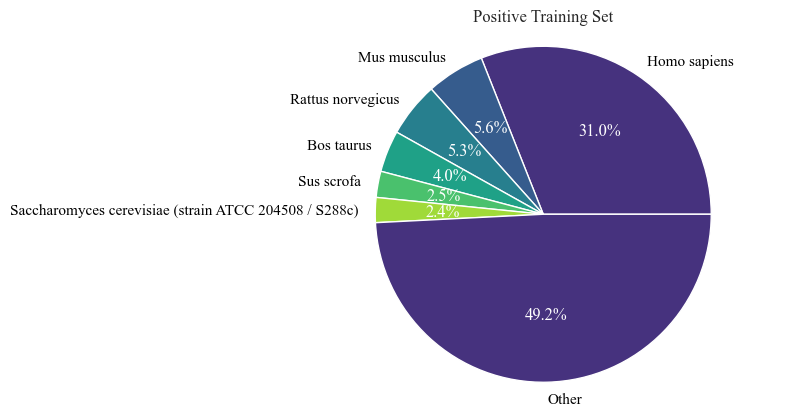

In [15]:
#Edit the dataframe to preserve only the most frequent species.
keep_labels = ["Homo sapiens", "Mus musculus", "Rattus norvegicus", "Bos taurus", "Sus scrofa", "Saccharomyces cerevisiae (strain ATCC 204508 / S288c)"]
for index, row in t_pos.iterrows():
    if row["Species"] not in keep_labels:
        t_pos.at[index, "Species"] = "Other"

#Count the values and locate 'Other' as the last section of the pie
pos_t_species = t_pos['Species'].value_counts()
if "Other" in t_species.index:
    pos_t_species = pd.concat([pos_t_species.drop("Other"), pos_t_species.loc[["Other"]]])

#Create the pie plot and format the labels
plt.title("Positive Training Set")
wedges, texts, autotexts = plt.pie(pos_t_species, labels=pos_t_species.index, autopct='%.1f%%')
plt.axis('equal')

for text in texts:
    text.set_color("black")
    text.set_fontsize(11)
for autotext in autotexts:
    autotext.set_color("white")
    autotext.set_fontweight("bold")

#Display the plot
plt.show()
#plt.savefig("pos_t_species.pdf", dpi=1000, format="pdf",bbox_inches="tight",pad_inches=0.2)
#plt.clf()

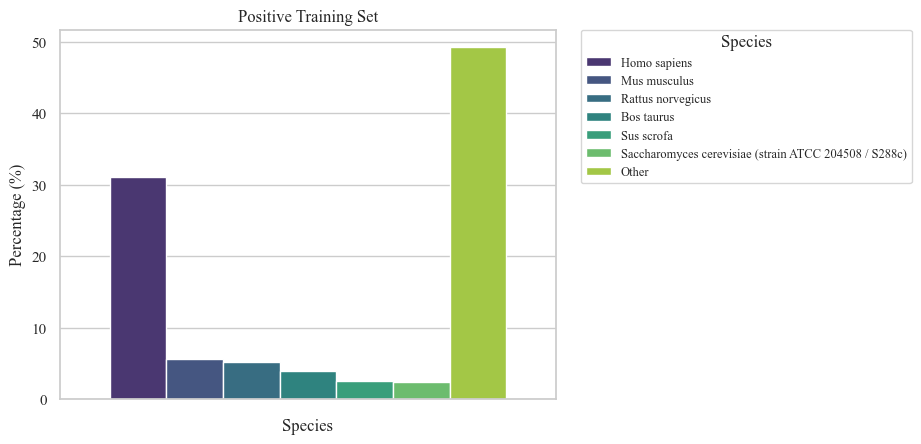

In [16]:
#Compute the percentages and locate 'Other' as the last column
pos_t_percent = pos_t_species / pos_t_species.sum() * 100
pos_t_percent = pos_t_percent.sort_values(ascending=False)
if "Other" in pos_t_percent.index:
  pos_t_percent = pd.concat([pos_t_percent.drop("Other"), pos_t_percent.loc[["Other"]]])

#Create the bar plot
ax = sns.barplot(hue=pos_t_percent.index, y=pos_t_percent.values, palette="viridis")
ax.set_title("Positive Training Set")
ax.set_ylabel("Percentage (%)")
ax.set_xlabel("Species")

#Move the legend outside the plot
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,fontsize=9,title="Species")

#Display the plots
plt.show()
#plt.savefig("pos_t_species_bar.pdf", dpi=1000, format="pdf",bbox_inches="tight",pad_inches=0.2)
#plt.clf()

Negative Training Set

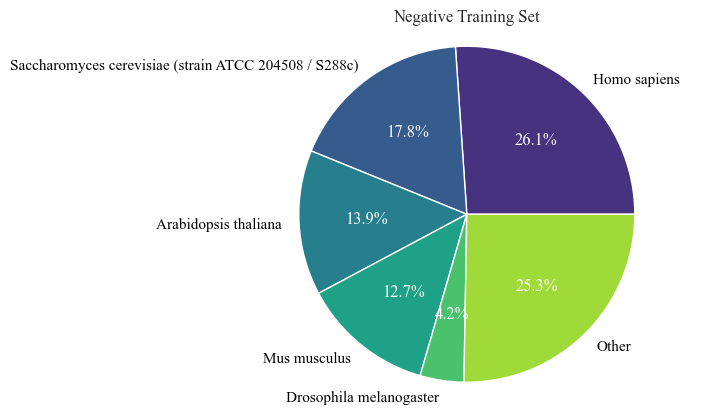

In [17]:
#Edit the dataframe to preserve only the most frequent species.
keep_labels = ["Homo sapiens", "Saccharomyces cerevisiae (strain ATCC 204508 / S288c)", "Arabidopsis thaliana", "Mus musculus", "Schizosaccharomyces pombe (strain 792 / ATCC 24843)", "Drosophila melanogaster"]

for index, row in t_neg.iterrows():
    if row["Species"] not in keep_labels:
       t_neg.at[index, "Species"] = "Other"

#Count the values and locate 'Other' as the last section of the pie
neg_t_species = t_neg['Species'].value_counts()
if "Other" in neg_t_species.index:
    neg_t_species = pd.concat([neg_t_species.drop("Other"), neg_t_species.loc[["Other"]]])

#Create the pie plot and format the labels
plt.title("Negative Training Set")
wedges, texts, autotexts = plt.pie(neg_t_species, labels=neg_t_species.index, autopct='%.1f%%',)
plt.axis('equal')

for text in texts:
    text.set_color("black")
    text.set_fontsize(11)
for autotext in autotexts:
    autotext.set_color("white")
    autotext.set_fontweight("bold")

#Display the plot
plt.show()
#plt.savefig("neg_t_species.pdf", dpi=1000, format="pdf",bbox_inches="tight",pad_inches=0.2)
#plt.clf()

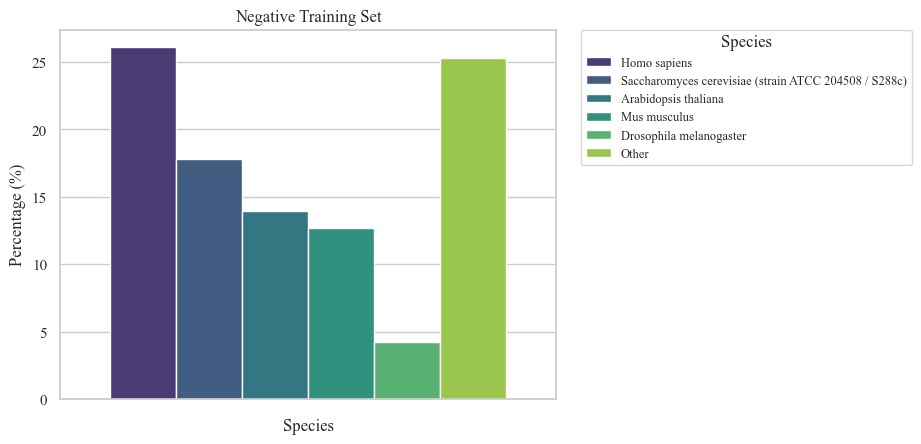

In [18]:
#Compute the percentages and locate 'Other' as the last column
neg_t_percent = neg_t_species / neg_t_species.sum() * 100
neg_t_percent = neg_t_percent.sort_values(ascending=False)
if "Other" in neg_t_percent.index:
  neg_t_percent = pd.concat([neg_t_percent.drop("Other"), neg_t_percent.loc[["Other"]]])

#Create the bar plot
ax = sns.barplot(hue=neg_t_percent.index, y=neg_t_percent.values, palette="viridis")
ax.set_title("Negative Training Set")
ax.set_ylabel("Percentage (%)")
ax.set_xlabel("Species")

#Move the legend outside the plot
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,fontsize=9,title="Species")

#Display the plots
plt.show()
#plt.savefig("neg_t_species_bar.pdf", dpi=1000, format="pdf",bbox_inches="tight",pad_inches=0.2)
#plt.clf()

Benchmarking Set

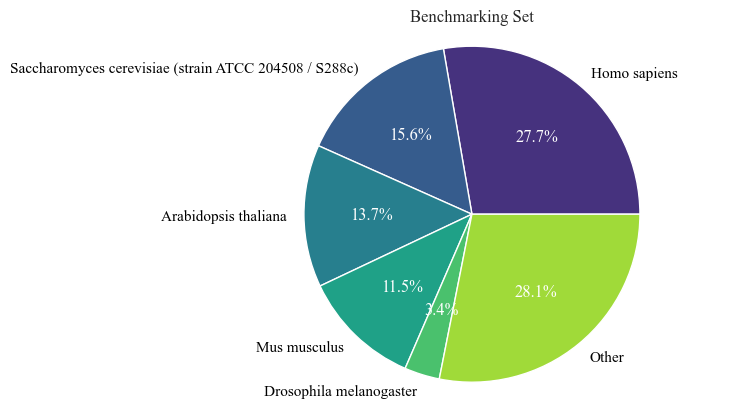

In [19]:
#Edit the dataframe to preserve only the most frequent species.
keep_labels = ["Homo sapiens", "Mus musculus", "Saccharomyces cerevisiae (strain ATCC 204508 / S288c)", "Arabidopsis thaliana", "Schizosaccharomyces pombe (strain 792 / ATCC 24843)", "Drosophila melanogaster"]
for index, row in b.iterrows():
    if row["Species"] not in keep_labels:
        b.at[index, "Species"] = "Other"

#Count the values and locate 'Other' as the last section of the pie
b_species = b['Species'].value_counts()
if "Other" in b_species.index:
    b_species = pd.concat([b_species.drop("Other"), b_species.loc[["Other"]]])

#Create the pie plot and format the labels
plt.title("Benchmarking Set")
wedges, texts, autotexts = plt.pie(b_species, labels=b_species.index, autopct='%.1f%%')
plt.axis('equal')

for text in texts:
    text.set_color("black")
    text.set_fontsize(11)
for autotext in autotexts:
    autotext.set_color("white")
    autotext.set_fontweight("bold")

#Display the plot
plt.show()
#plt.savefig("b_species.pdf", dpi=1000, format="pdf")
#plt.clf()

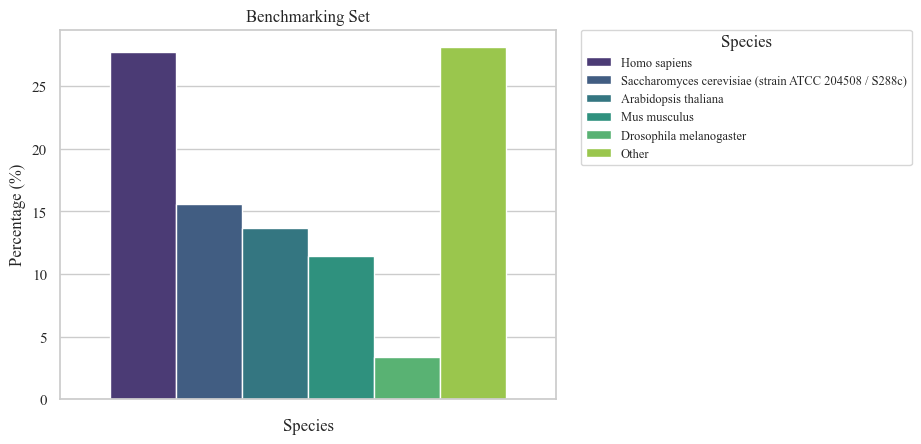

In [20]:
#Compute the percentages
b_percent = b_species / b_species.sum() * 100

#Compute the percentages and locate 'Other' as the last column
b_percent = b_species / b_species.sum() * 100
b_percent = b_percent.sort_values(ascending=False)
if "Other" in b_percent.index:
  b_percent = pd.concat([b_percent.drop("Other"), b_percent.loc[["Other"]]])

#Create the bar plot
ax = sns.barplot(hue=b_percent.index, y=b_percent.values, palette="viridis")
ax.set_title("Benchmarking Set")
ax.set_ylabel("Percentage (%)")
ax.set_xlabel("Species")

#Move the legend outside the plot
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,fontsize=9,title="Species")

#Display the plots
plt.show()
#plt.savefig("b_species_bar.pdf", dpi=1000, format="pdf",bbox_inches="tight",pad_inches=0.2)
#plt.clf()

Positive Benchmarking Set

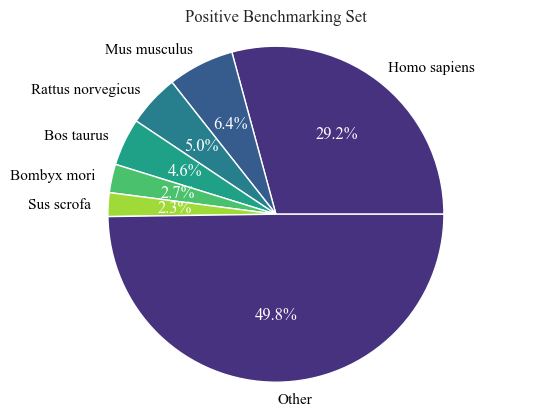

In [21]:
#Edit the dataframe to preserve only the most frequent species.
keep_labels = ["Homo sapiens", "Mus musculus", "Rattus norvegicus", "Bos taurus", "Bombyx mori", "Sus scrofa"]
for index, row in b_pos.iterrows():
    if row["Species"] not in keep_labels:
        b_pos.at[index, "Species"] = "Other"

#Count the values and locate 'Other' as the last section of the pie
pos_b_species = b_pos['Species'].value_counts()
if "Other" in pos_b_species.index:
    pos_b_species = pd.concat([pos_b_species.drop("Other"), pos_b_species.loc[["Other"]]])

#Count the values and locate 'Other' as the last section of the pie
pos_b_species = b_pos['Species'].value_counts()
if "Other" in t_species.index:
    pos_b_species = pd.concat([pos_b_species.drop("Other"), pos_b_species.loc[["Other"]]])

#Create the pie plot and format the labels
plt.title("Positive Benchmarking Set")
wedges, texts, autotexts = plt.pie(pos_b_species, labels=pos_b_species.index, autopct='%.1f%%')
plt.axis('equal')

for text in texts:
    text.set_color("black")
    text.set_fontsize(11)
for autotext in autotexts:
    autotext.set_color("white")
    autotext.set_fontweight("bold")

#Display the plot
plt.show()
#plt.savefig("pos_b_species.pdf", dpi=1000, format="pdf")
#plt.clf()

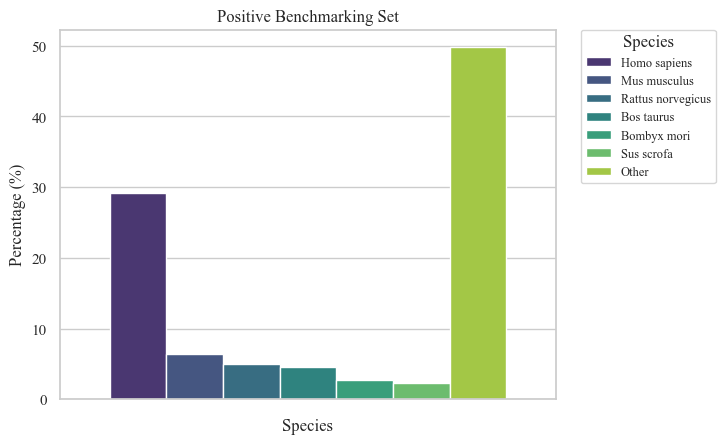

In [22]:
#Compute the percentages
pos_b_percent = pos_b_species / pos_b_species.sum() * 100

#Compute the percentages and locate 'Other' as the last column
pos_b_percent = pos_b_species / pos_b_species.sum() * 100
pos_b_percent = pos_b_percent.sort_values(ascending=False)
if "Other" in pos_b_percent.index:
  pos_b_percent = pd.concat([pos_b_percent.drop("Other"), pos_b_percent.loc[["Other"]]])

#Create the bar plot
ax = sns.barplot(hue=pos_b_percent.index, y=pos_b_percent.values, palette="viridis")
ax.set_title("Positive Benchmarking Set")
ax.set_ylabel("Percentage (%)")
ax.set_xlabel("Species")

#Move the legend outside the plot
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,fontsize=9,title="Species")

#Display the plots
plt.show()
#plt.savefig("pos_b_species_bar.pdf", dpi=1000, format="pdf",bbox_inches="tight",pad_inches=0.2)
#plt.clf()

Negative Benchmarking Set

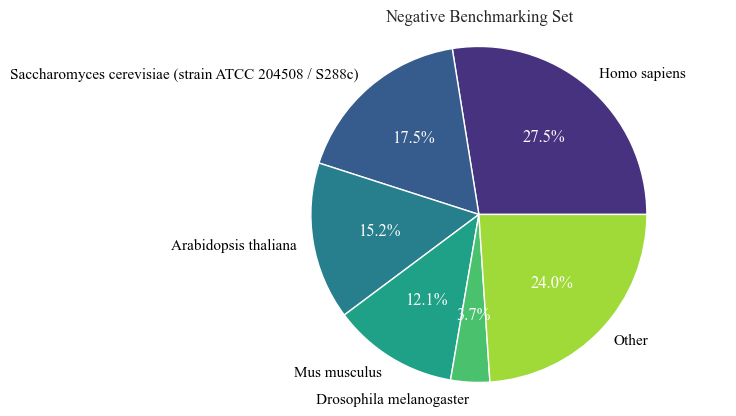

In [23]:
#Edit the dataframe to preserve only the most frequent species.
keep_labels = ["Homo sapiens", "Saccharomyces cerevisiae (strain ATCC 204508 / S288c)", "Arabidopsis thaliana", "Mus musculus", "Schizosaccharomyces pombe (strain 792 / ATCC 24843)", "Drosophila melanogaster"]

for index, row in b_neg.iterrows():
    if row["Species"] not in keep_labels:
       b_neg.at[index, "Species"] = "Other"

#Count the values and locate 'Other' as the last section of the pie
neg_b_species = b_neg['Species'].value_counts()
if "Other" in neg_b_species.index:
    neg_b_species = pd.concat([neg_b_species.drop("Other"), neg_b_species.loc[["Other"]]])

#Create the pie plot and format the labels
plt.title("Negative Benchmarking Set")
wedges, texts, autotexts = plt.pie(neg_b_species, labels=neg_b_species.index, autopct='%.1f%%',)
plt.axis('equal')

for text in texts:
    text.set_color("black")
    text.set_fontsize(11)
for autotext in autotexts:
    autotext.set_color("white")
    autotext.set_fontweight("bold")

#Display the plot
plt.show()
#plt.savefig("neg_b_species.pdf", dpi=1000, format="pdf",bbox_inches="tight",pad_inches=0.2)
#plt.clf()

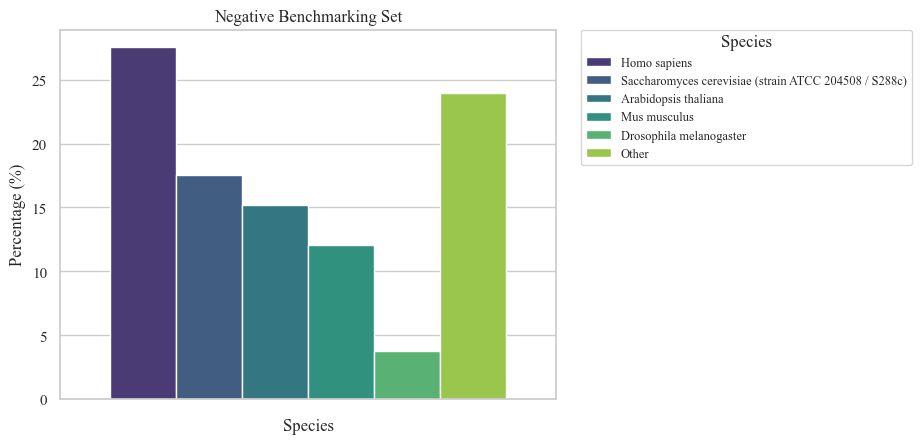

In [24]:
#Compute the percentages and locate 'Other' as the last column
neg_b_percent = neg_b_species / neg_b_species.sum() * 100
neg_b_percent = neg_b_percent.sort_values(ascending=False)
if "Other" in neg_b_percent.index:
  neg_b_percent = pd.concat([neg_b_percent.drop("Other"), neg_b_percent.loc[["Other"]]])

#Create the bar plot
ax = sns.barplot(hue=neg_b_percent.index, y=neg_b_percent.values, palette="viridis")
ax.set_title("Negative Benchmarking Set")
ax.set_ylabel("Percentage (%)")
ax.set_xlabel("Species")

#Move the legend outside the plot
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,fontsize=9,title="Species")

#Display the plots
plt.show()
#plt.savefig("neg_b_species_bar.pdf", dpi=1000, format="pdf",bbox_inches="tight",pad_inches=0.2)
#plt.clf()

**Second plots. Protein length**

**Distribution**

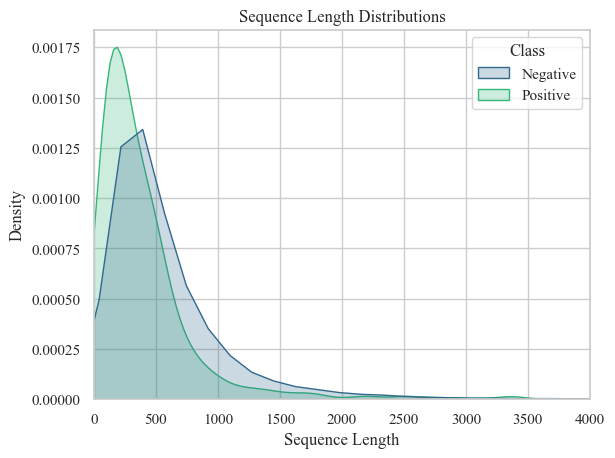

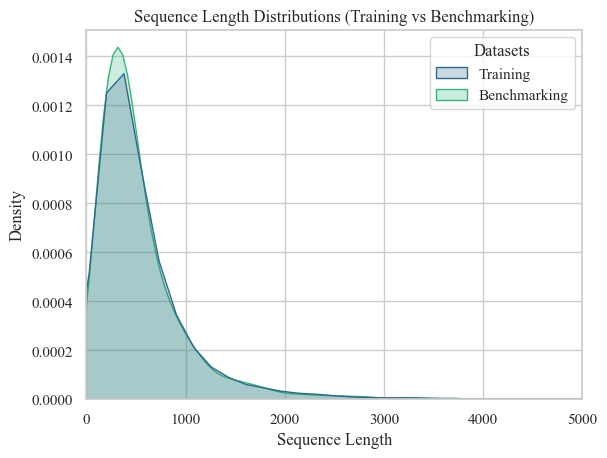

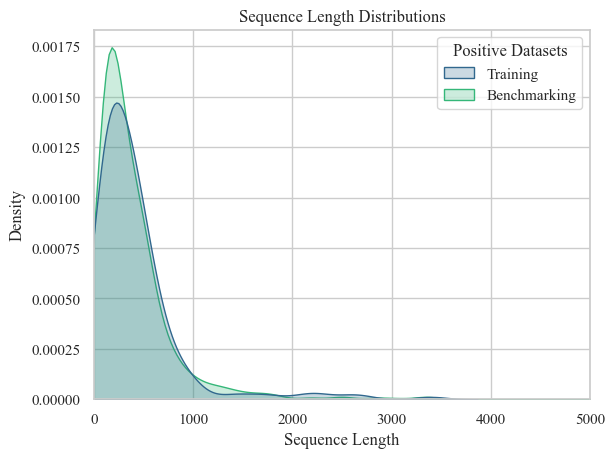

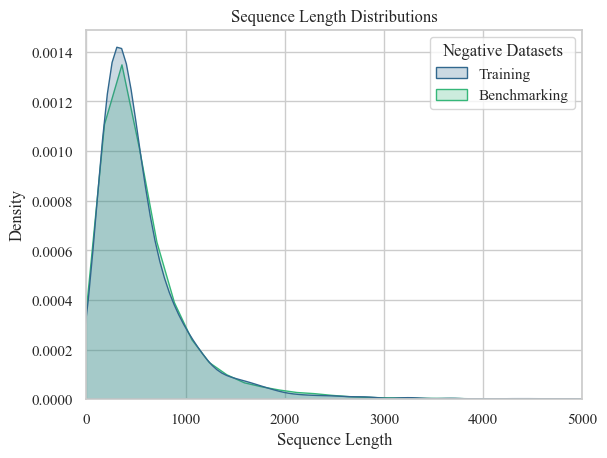

In [25]:
#Label the datasets
neg_0 = neg.assign(SP=0)
pos_1 = pos.assign(SP=1)

#Labeling bench and training for positives
for index, row in pos_1.iterrows():
    if row["T or B"] != 0:
        pos_1.at[index, "T or B"] = 0
    else:
        pos_1.at[index, "T or B"] = 1

#Labeling bench and training for negatives
for index, row in neg_0.iterrows():
    if row["T or B"] != 0:
        neg_0.at[index, "T or B"] = 0
    else:
        neg_0.at[index, "T or B"] = 1

#Concatenate the positives and the negatives ina single dataset
data = pd.concat([pos_1, neg_0])

#Plot the compared distributions of positives and negatives with respect to Sequence Length
a = sns.kdeplot(data=data, x="Seq_Length", hue="SP",common_norm=False,palette="viridis",fill=True)
a.set(title="Sequence Length Distributions",xlabel="Sequence Length",xlim=(0,4000))
sns.move_legend(a, "upper right",title="Class",labels=["Negative", "Positive"])
plt.show()
#plt.savefig("Seq_length_posneg.pdf", dpi=1000, format="pdf",bbox_inches="tight",pad_inches=0.2)
#plt.clf()

#Labeling bench and training for positives
for index, row in pos_1.iterrows():
    if row["T or B"] != 0:
        pos_1.at[index, "T or B"] = 0
    else:
        pos_1.at[index, "T or B"] = 1

#Labeling bench and training for negatives
for index, row in neg_0.iterrows():
    if row["T or B"] != 0:
        neg_0.at[index, "T or B"] = 0
    else:
        neg_0.at[index, "T or B"] = 1

#Plot the compared distributions of all sequences (training vs benchmarking) with respect to Sequence Length
b = sns.kdeplot(data=data, x="Seq_Length", hue="T or B", common_norm=False, palette="viridis", fill=True)
b.set(title="Sequence Length Distributions (Training vs Benchmarking)",xlabel="Sequence Length",xlim=(0,5000))
sns.move_legend(b, "upper right", title="Datasets", labels=["Training", "Benchmarking"])
plt.show()
#plt.savefig("Seq_length_TB.pdf", dpi=1000, format="pdf", bbox_inches="tight", pad_inches=0.2)
#plt.clf()

#Plot the compared distributions of positives (training and benchmarking) with respect to Sequence Length
c = sns.kdeplot(data=pos_1,x="Seq_Length",hue="T or B",common_norm=False,palette="viridis",fill=True)
c.set(title="Sequence Length Distributions",xlabel="Sequence Length",xlim=(0,5000))
sns.move_legend(c, "upper right",title="Positive Datasets",labels=["Training", "Benchmarking"])
plt.show()
#plt.savefig("Seq_length_pos.pdf", dpi=1000, format="pdf",bbox_inches="tight",pad_inches=0.2)
#plt.clf()

#Plot the compared distributions of negatives (training and benchmarking) with respect to Sequence Length
d = sns.kdeplot(data=neg_0,x="Seq_Length",hue="T or B",common_norm=False,palette="viridis",fill=True)
d.set(title="Sequence Length Distributions",xlabel="Sequence Length",xlim=(0,5000))
sns.move_legend(d, "upper right",title="Negative Datasets",labels=["Training", "Benchmarking"])
d.set(xlim=(0,5000))
plt.show()
#plt.savefig("Seq_length_neg.pdf", dpi=1000, format="pdf",bbox_inches="tight",pad_inches=0.2)
#plt.clf()

**Boxplots**

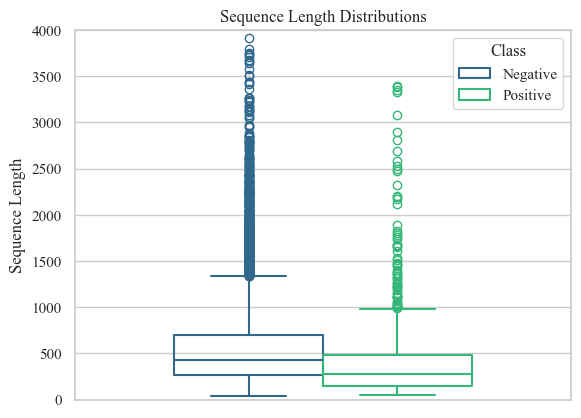

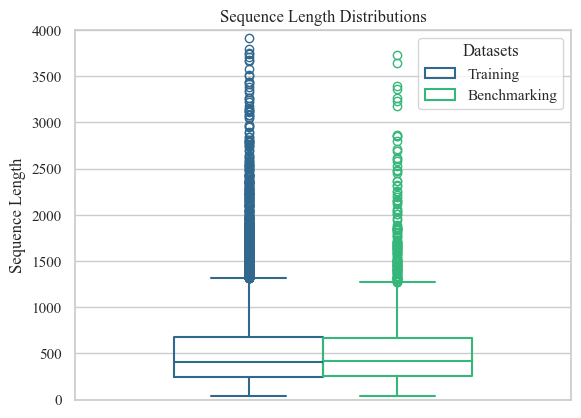

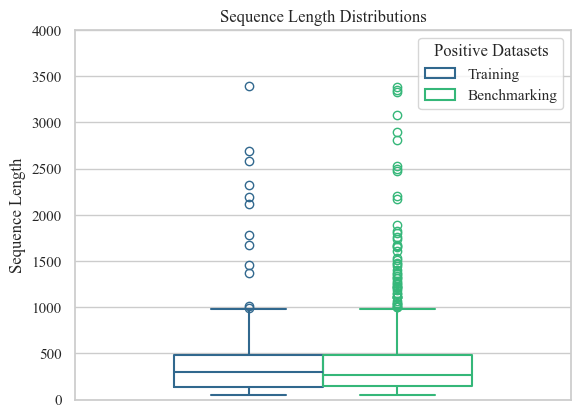

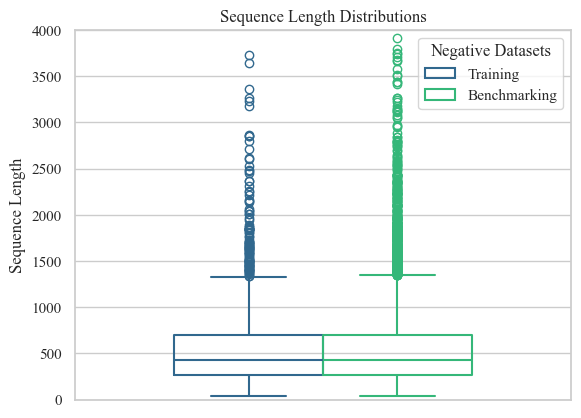

In [26]:
#Plot the compared distributions of positives and negatives with respect to Sequence Length
a = sns.boxplot(data=data,y="Seq_Length",hue="SP",width=0.6,palette="viridis",fill=False)
a.set(title="Sequence Length Distributions",ylabel="Sequence Length",ylim=(0,4000))
sns.move_legend(a, "upper right",title="Class",labels=["Negative", "Positive"])
plt.show()
#plt.savefig("Seq_length_posneg_box.pdf", dpi=1000, format="pdf")
#plt.clf()

#Plot the compared distributions of all sequences (training vs benchmarking) with respect to Sequence Length
b = sns.boxplot(data=data,y="Seq_Length",hue="T or B",width=0.6,palette="viridis",fill=False)
b.set(title="Sequence Length Distributions",ylabel="Sequence Length",ylim=(0,4000))
sns.move_legend(b, "upper right",title="Datasets",labels=["Training", "Benchmarking"])
plt.show()
#plt.savefig("Seq_length_TB_box.pdf", dpi=1000, format="pdf")
#plt.clf()

#Plot the compared distributions of positives (training and benchmarking) with respect to Sequence Length
c = sns.boxplot(data=pos_1,y="Seq_Length",hue="T or B",width=0.6,palette="viridis",fill=False)
c.set(title="Sequence Length Distributions",ylabel="Sequence Length",ylim=(0,4000))
sns.move_legend(c, "upper right",title="Positive Datasets",labels=["Training", "Benchmarking"])
plt.show()
#plt.savefig("Seq_length_pos_box.pdf", dpi=1000, format="pdf")
#plt.clf()

#Plot the compared distributions of negatives (training and benchmarking) with respect to Sequence Length
d = sns.boxplot(data=neg_0,y="Seq_Length",hue="T or B",width=0.6,palette="viridis",fill=False)
d.set(title="Sequence Length Distributions",ylabel="Sequence Length",ylim=(0,4000))
sns.move_legend(d, "upper right",title="Negative Datasets",labels=["Training", "Benchmarking"])
plt.show()
#plt.savefig("Seq_length_neg_box.pdf", dpi=1000, format="pdf")
#plt.clf()

**Histograms**

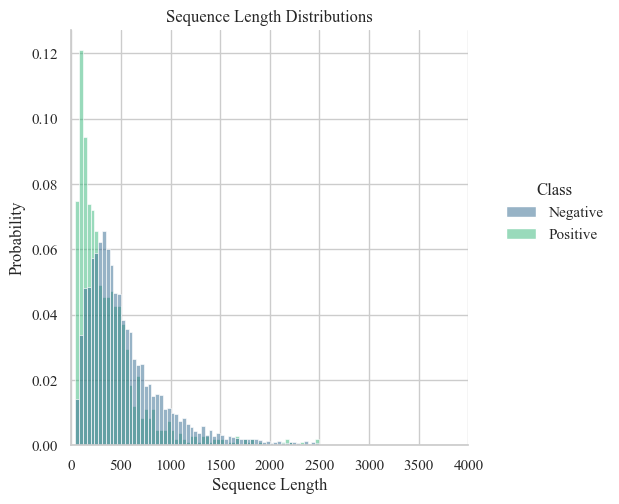

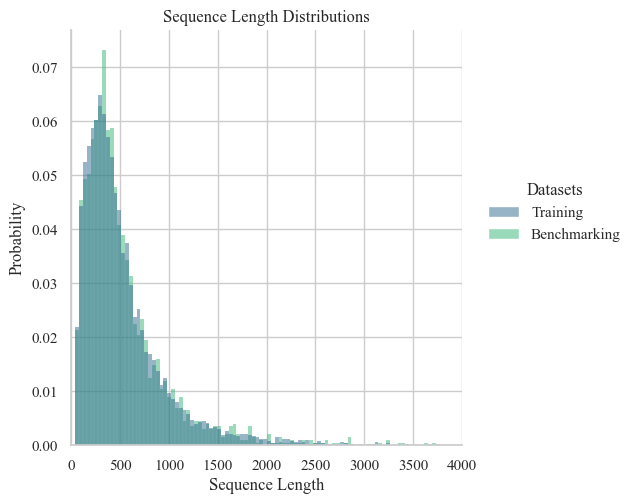

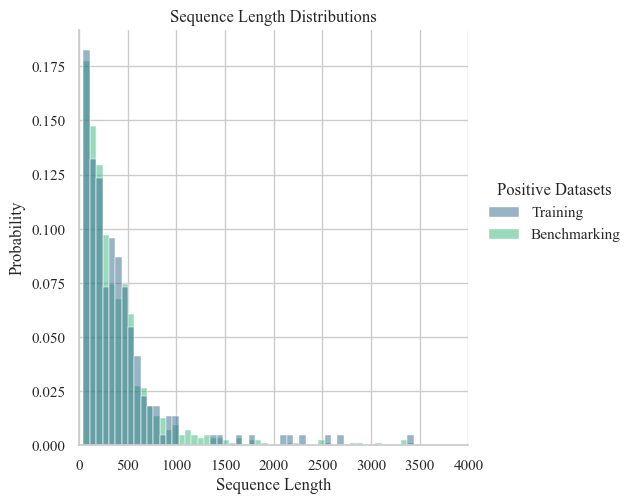

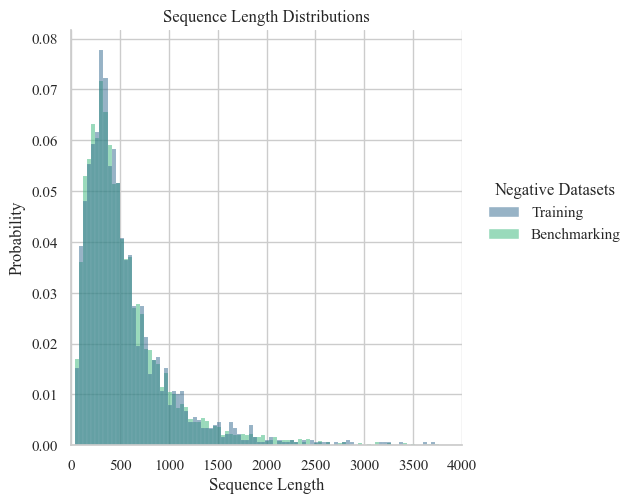

In [27]:
#Plot the compared distributions of positives and negatives with respect to Sequence Length
a = sns.displot(data = data[data["Seq_Length"]<=2500],x = "Seq_Length",hue = "SP",common_norm = False,stat = "probability",palette="viridis",fill=True)
a.set(title="Sequence Length Distributions",xlabel="Sequence Length",xlim=(0,4000))
sns.move_legend(a, "center",bbox_to_anchor=(1, 0.6),title="Class",labels=["Negative", "Positive"])
plt.show()
#plt.savefig("Seq_length_posneg_hist.pdf", dpi=1000, format="pdf",bbox_inches="tight",pad_inches=0.2)
#plt.clf()

#Plot the compared distributions of all sequences (training vs benchmarking) with respect to Sequence Length
b = sns.displot(data=data,x="Seq_Length",hue="T or B",common_norm = False,stat="probability",palette="viridis",fill=True)
b.set(title="Sequence Length Distributions",xlabel="Sequence Length",xlim=(0,4000))
sns.move_legend(b, "center",bbox_to_anchor=(1, 0.6),title="Datasets",labels=["Training", "Benchmarking"])
plt.show()
#plt.savefig("Seq_length_TB_hist.pdf", dpi=1000, format="pdf",bbox_inches="tight",pad_inches=0.2)
#plt.clf()

#Plot the compared distributions of positives (training and benchmarking) with respect to Sequence Length
c = sns.displot(data=pos_1,x="Seq_Length",hue="T or B",common_norm = False,stat="probability",palette="viridis",fill=True)
c.set(title="Sequence Length Distributions",xlabel="Sequence Length",xlim=(0,4000))
sns.move_legend(c, "center",bbox_to_anchor=(1, 0.6),title="Positive Datasets",labels=["Training", "Benchmarking"])
plt.show()
#plt.savefig("Seq_length_pos_hist.pdf", dpi=1000, format="pdf",bbox_inches="tight",pad_inches=0.2)
#plt.clf()

#Plot the compared distributions of negatives (training and benchmarking) with respect to Sequence Length
d = sns.displot(data=neg_0,x="Seq_Length",hue="T or B",common_norm = False,stat="probability",palette="viridis",fill=True)
d.set(title="Sequence Length Distributions",xlabel="Sequence Length",xlim=(0,4000))
sns.move_legend(d, "center",bbox_to_anchor=(1, 0.6),title="Negative Datasets",labels=["Training", "Benchmarking"])
plt.show()
#plt.savefig("Seq_length_neg_hist.pdf", dpi=1000, format="pdf",bbox_inches="tight",pad_inches=0.2)
#plt.clf()

**Third Plots. SP length**

**Distribution**

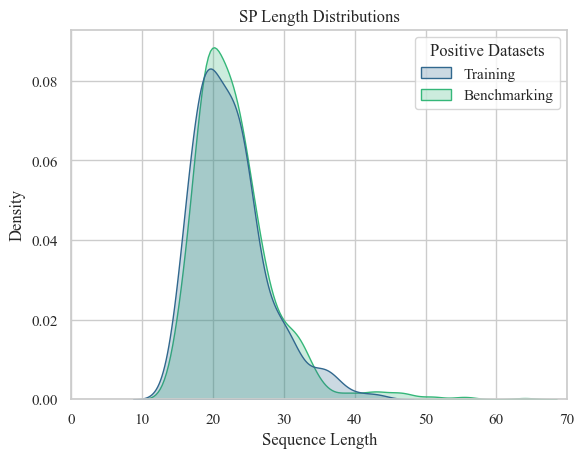

In [28]:
#Plot the distribution of signal peptide length with respect to training and benchmarking datasets of positive class
a = sns.kdeplot(data=pos_1, x="Cleavage", hue="T or B",common_norm=False,palette="viridis",fill=True)
a.set(title="SP Length Distributions",xlabel="Sequence Length",xlim=(0,70))
sns.move_legend(a, "upper right",title="Positive Datasets",labels=["Training", "Benchmarking"])
plt.show()
#plt.savefig("SP_length_dist.pdf", dpi=1000, format="pdf")
#plt.clf()


**Boxplot**

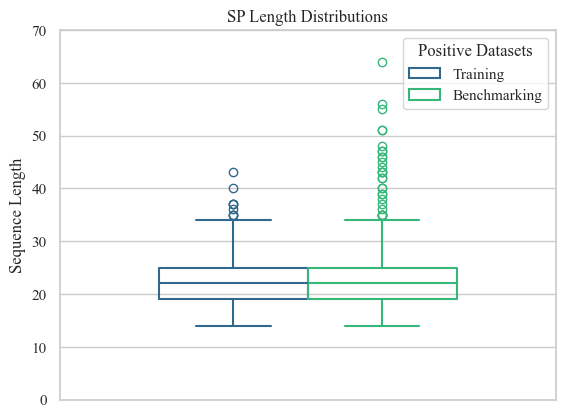

In [29]:
#Plot the compared distributions of signal peptide length with respect to training and benchmarking datasets of positive class
a = sns.boxplot(data=pos_1,y="Cleavage",hue="T or B",width=0.6,palette="viridis",fill=False)
a.set(title="SP Length Distributions",ylabel="Sequence Length",ylim=(0,70))
sns.move_legend(a, "upper right",title="Positive Datasets",labels=["Training", "Benchmarking"])
plt.show()
#plt.savefig("SP_length_box.pdf", dpi=1000, format="pdf")
#plt.clf()

**Histogram**

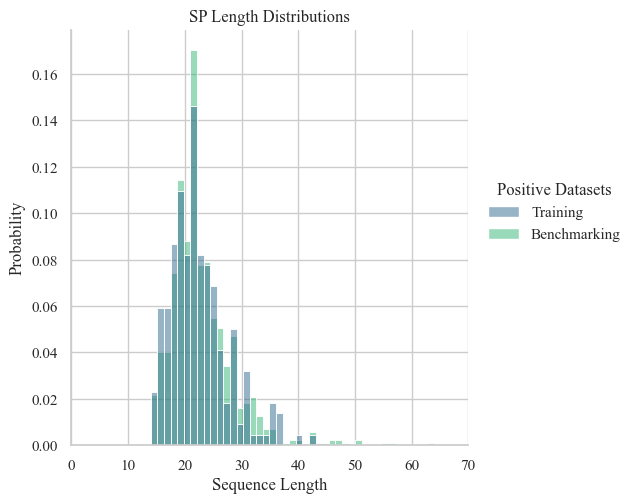

In [30]:
#Plot the compared distributions of positives (training and benchmarking) with respect to Sequence Length
a = sns.displot(data=pos_1,x="Cleavage",hue="T or B",common_norm = False,stat="probability",palette="viridis",fill=True)
a.set(title="SP Length Distributions",xlabel="Sequence Length",xlim=(0,70))
sns.move_legend(a, "center",bbox_to_anchor=(1, 0.6),title="Positive Datasets",labels=["Training", "Benchmarking"])
plt.show()
#plt.savefig("SP_length_hist.pdf", dpi=1000, format="pdf",bbox_inches="tight",pad_inches=0.2)
#plt.clf()

**Fourth plots. Comparative amino-acid composition of SPs against some background distribution**

In [ ]:
#Funtion to clean the output fasta file obtained by the search in UniProt using the list of randomized IDs from the positive dataset
def edit_fasta(fasta, cleaned_fasta):
    with open(fasta, "r") as reader:
        for line in reader:
            if line.startswith(">"):
                with open(cleaned_fasta, "a") as writer:
                    writer.write("\n>"+line.split("|")[1]+"\n")
            else:
                l = line.rstrip()
                with open(cleaned_fasta, "a") as writer:
                    writer.write(l)

edit_fasta("pos_rand.fasta", "pos_cleaned.fasta")

In [31]:
#Extract lists containing cleavage sites for the positive class (training and benchmarking)
cleavages = []
for index,row in pos.iterrows():
  cleavages.append(row["Cleavage"])

cleavages_train = cleavages[:874]
cleavages_bench = cleavages[874:]

#Extract lists containing signal peptide sequences for the positive class (training and benchmarking)
sps_train = []
sps_bench = []
i = 0
j = 0
with open("pos_cleaned.fasta", "r") as reader:
  for line in reader:
    if not line.startswith(">") and i < 874:
      sps_train.append(line[:cleavages_train[i]])
      i += 1
    elif not line.startswith(">") and j < len(cleavages_bench):
      sps_bench.append(line[:cleavages_bench[j]])
      j += 1

In [32]:
#Store composition of the residues in the signal peptides for training and benchmarking datasets
residues_train = {"A" : 0, "C" : 0, "D" : 0, "E" : 0, "F" : 0, "G" : 0, "H" : 0, "I" : 0, "K" : 0,
            "L" : 0, "M" : 0, "N" : 0, "P" : 0, "Q" : 0, "R" : 0, "S" : 0, "T" : 0, "V" : 0,
            "W" : 0, "Y" : 0}

tot_x = 0
tot_aa = 0

for seq in sps_train:
  for res in seq:
    tot_aa += 1
    if res != "X" and res != "\n":
      residues_train[res] += 1
    else:
      tot_x += 1

print("\nThere are "+str(tot_x)+" X residues in the training set, over "+str(tot_aa)+" residues in total.\n")

composition_train = {"A" : 0, "C" : 0, "D" : 0, "E" : 0, "F" : 0, "G" : 0, "H" : 0, "I" : 0, "K" : 0,
            "L" : 0, "M" : 0, "N" : 0, "P" : 0, "Q" : 0, "R" : 0, "S" : 0, "T" : 0, "V" : 0,
            "W" : 0, "Y" : 0}

for res in residues_train:
  composition_train[res] = round(float(residues_train[res]/(tot_aa - tot_x))*100,2)
print(composition_train)

residues_bench = {"A" : 0, "C" : 0, "D" : 0, "E" : 0, "F" : 0, "G" : 0, "H" : 0, "I" : 0, "K" : 0,
            "L" : 0, "M" : 0, "N" : 0, "P" : 0, "Q" : 0, "R" : 0, "S" : 0, "T" : 0, "V" : 0,
            "W" : 0, "Y" : 0}

tot_x = 0
tot_aa = 0
for seq in sps_bench:
  for res in seq:
    tot_aa += 1
    if res != "X" and res != "\n":
      residues_bench[res] += 1
    else:
      tot_x += 1

print("\nThere are "+str(tot_x)+" X residues in the benchmarking set, over "+str(tot_aa)+" residues in total.\n")

composition_bench = {"A" : 0, "C" : 0, "D" : 0, "E" : 0, "F" : 0, "G" : 0, "H" : 0, "I" : 0, "K" : 0,
            "L" : 0, "M" : 0, "N" : 0, "P" : 0, "Q" : 0, "R" : 0, "S" : 0, "T" : 0, "V" : 0,
            "W" : 0, "Y" : 0}

for res in residues_bench:
  composition_bench[res] = round(float(residues_bench[res]/(tot_aa - tot_x))*100,2)

print(composition_bench)

for i in sps_bench:
  for j in i:
    if j == "\n":
      print("eccolo")


There are 10 X residues in the training set, over 20108 residues in total.

{'A': 14.21, 'C': 2.96, 'D': 0.84, 'E': 1.31, 'F': 5.1, 'G': 6.04, 'H': 1.1, 'I': 4.58, 'K': 2.25, 'L': 21.93, 'M': 6.32, 'N': 1.02, 'P': 4.15, 'Q': 2.03, 'R': 3.29, 'S': 7.57, 'T': 4.32, 'V': 8.12, 'W': 1.79, 'Y': 1.06}

There are 0 X residues in the benchmarking set, over 4914 residues in total.

{'A': 14.63, 'C': 2.63, 'D': 0.94, 'E': 1.42, 'F': 4.64, 'G': 5.84, 'H': 1.16, 'I': 4.31, 'K': 2.08, 'L': 22.06, 'M': 6.37, 'N': 0.92, 'P': 3.85, 'Q': 2.08, 'R': 2.99, 'S': 7.39, 'T': 5.03, 'V': 9.08, 'W': 1.75, 'Y': 0.85}


In [33]:
#Store the residue composition from the SwissProt database in a dictionary
swissprot = {"A" : 8.25, "C" : 1.38, "D" : 5.46, "E" : 6.71, "F" : 3.86, "G" : 7.07, "H" : 2.27, "I" : 5.90, "K" : 5.79,
            "L" : 9.64, "M" : 2.41, "N" : 4.06, "P" : 4.74, "Q" : 3.93, "R" : 5.52, "S" : 6.65, "T" : 5.36, "V" : 6.85,
            "W" : 1.10, "Y" : 2.92}

lab = ["Residue", "Composition"]

comp_t = pd.DataFrame(list(composition_train.items()),
                  columns=lab)
comp_t["Database"] = "T"
comp_b = pd.DataFrame(list(composition_bench.items()),
                  columns=lab)
comp_b["Database"] = "B"
comp_s = pd.DataFrame(list(swissprot.items()),
                  columns=lab)
comp_s["Database"] = "S"
frames = [comp_t, comp_b, comp_s]

composition = pd.concat(frames, ignore_index=True)
composition = composition.sort_values(by = ["Residue"]).reset_index(drop=True)
print(composition)


   Residue  Composition Database
0        A        14.21        T
1        A        14.63        B
2        A         8.25        S
3        C         2.96        T
4        C         2.63        B
5        C         1.38        S
6        D         0.84        T
7        D         0.94        B
8        D         5.46        S
9        E         1.31        T
10       E         1.42        B
11       E         6.71        S
12       F         5.10        T
13       F         4.64        B
14       F         3.86        S
15       G         5.84        B
16       G         7.07        S
17       G         6.04        T
18       H         2.27        S
19       H         1.10        T
20       H         1.16        B
21       I         5.90        S
22       I         4.58        T
23       I         4.31        B
24       K         2.08        B
25       K         5.79        S
26       K         2.25        T
27       L         9.64        S
28       L        22.06        B
29       L

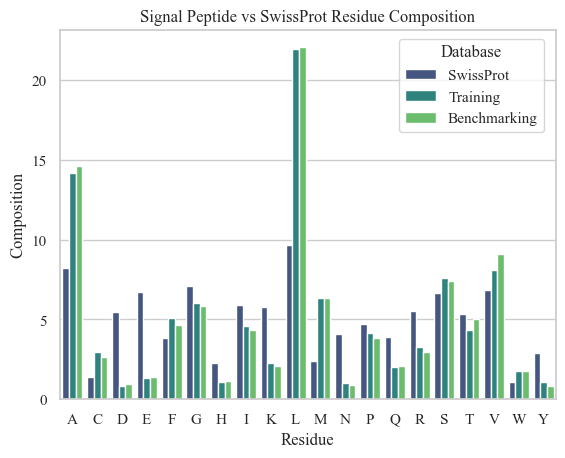

In [34]:
#Plot residue composition with respect to three datasets (training, benchmarking and SwissProt)
a = sns.barplot(data = composition, x = "Residue", y = "Composition", hue = "Database", hue_order= ["S", "T", "B"],palette="viridis",fill=True)
a.set_title("Signal Peptide vs SwissProt Residue Composition")
sns.move_legend(a, "center",bbox_to_anchor=(0.83, 0.85),title="Database",labels=["SwissProt", "Training", "Benchmarking"])
plt.show()
#plt.savefig("residue_composition.pdf", dpi=1000, format="pdf")
#plt.clf()

**Fifth plots. Sequence logos of SP cleavage sites**

In [35]:
#Generate .fasta files containing relevant 15 residues of SPs for training and benchmarking datasets. These files were used as input for the weblogo tool.
i = 0
with open("train_sp.fasta", "a") as writer:
  for el in sps_train:
    writer.write(">"+pos["UniProt_ID"][i]+"\n" + el + "\n")
    i += 1
with open("bench_sp.fasta", "a") as writer:
  for el in sps_bench:
    writer.write(">"+pos["UniProt_ID"][i]+"\n" + el + "\n")
    i += 1

In order to create the sequence logos we used the .fasta files as input in the tool "weblogo".